In [ ]:
Descripción

Configuración del ambiente
Para empezar, puedes utilizar un entorno virtual como Google Colaboratory, o si deseas, puedes usar el editor
Python de tu preferencia, sólo asegúrate de tener Python 3.x instalado en tu computadora.

En el proyecto usaremos 5 variables que serán manipuladas dentro de varias funciones, estas variables son 
conocidas como variables globales, es necesario que las definas aquí de la siguiente forma:
global 
df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

También necesitarás instalar algunas librerías de Python que son esenciales para este proyecto, como Pandas, 
Numpy, Matplotlib, etc.

Para estar seguros de que tenemos todo listo en nuestro Ambiente, podemos ejecutar las siguientes líneas de código:

!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'
El resultado debería ser las bibliotecas y sus versiones que tenemos instaladas en nuestro Ambiente, si tienes
algún error revisa tu configuración, talvez falte instalar alguna biblioteca.



# 1. Configuración del ambiente

In [9]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Numpy | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.7.6
------
Name: pandas
Version: 1.3.5
------
Name: numpy
Version: 1.18.1
------
Name: matplotlib
Version: 3.1.3


In [96]:
import numpy as np


## 1.1 definir variables globales

In [39]:
# Definir variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision


# 2. Obtención de datos

In [ ]:
Descripción

Obtención de datos
Crea una funcion importar_base_bitcoin(), dentro de ella, define nuevamente las variables globales(ver Paso1) y
escribe tu código:

Utiliza la biblioteca yfinance de Python para extraer el histórico de precios del Bitcoin en dólares BTC-USD, 
deberás extraer el histórico de los últimos 7 días en intervalos de 5 minutos, este histórico deberás guardarlo en
el dataframe df_bitcoin.

Crea una funcion extraer_tendencias(), dentro de ella, define nuevamente las variables globales(ver Paso1) y 
escribe tu código:

Utilizando la biblioteca BeautifulSoup deberás realizar Web Scraping de la página https://coinmarketcap.com/ 
para extraer el precio actual del Bitcoin BTC en dólares USD y la variación de su precio en la última hora 1h % . 
El precio deberás convertirlo a float y guardarlo en la variable llamada precio_actual. Ahora, en la variable 
tendencia guarda el valor de 'baja'si la variación del precio es negativa, sino, guarda el valor de 'alta'.

Apoyo
Puedes encontrar más información de como instalar y usar la biblioteca yfinance en su página oficial: yfinance.
Además de los recursos mencionados en el card ‘Para saber más’ del Trello, puedes encontrar información 
complementar de Web Scraping en el siguiente enlace: Web Scraping con Python: Cómo Extraer Datos de Sitios Web.

## 2.1 Precios historico del bitcoin

In [139]:
def importar_base_bitcoin():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

    symbol = 'BTC-USD'

    # fecha de inicio y fin para los últimos 7 días
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=7)

    # Descarga el precio histórico del bitcoin en intervalos de 5 minutos
    data = yf.download(symbol, start=start_date, end=end_date, interval='5m')

    # Pausa durante 5 minutos antes de la próxima actualización
    #time.sleep(300)  # 300 segundos = 5 minutos
    
    df_bitcoin = pd.DataFrame(data)
    #print(df_bitcoin)
    
importar_base_bitcoin()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#########

In [62]:
df_bitcoin

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-06 00:00:00+00:00,27412.123047,27423.445312,27412.123047,27423.054688,27423.054688,0
2023-10-06 00:05:00+00:00,27423.642578,27423.642578,27418.119141,27418.119141,27418.119141,0
2023-10-06 00:10:00+00:00,27422.910156,27422.910156,27415.296875,27415.880859,27415.880859,16424960
2023-10-06 00:15:00+00:00,27416.308594,27416.308594,27405.029297,27405.029297,27405.029297,3702784
2023-10-06 00:20:00+00:00,27405.863281,27412.542969,27401.708984,27412.542969,27412.542969,0
...,...,...,...,...,...,...
2023-10-12 23:35:00+00:00,26755.378906,26759.136719,26755.378906,26755.503906,26755.503906,2469888
2023-10-12 23:40:00+00:00,26755.205078,26755.205078,26742.878906,26742.878906,26742.878906,0
2023-10-12 23:45:00+00:00,26744.394531,26748.183594,26744.394531,26745.517578,26745.517578,0


## 2.2 Scraping Precio bitcoin de coinmarketcap

In [149]:
def extraer_tendencias():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
    from bs4 import BeautifulSoup
    import requests

    ua = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62 (compatible; Linux; Ubuntu; MacOS; Windows)"}
    website = 'https://coinmarketcap.com/'
    # Get Request
    response = requests.get(website)
  
    # Soup Object
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer el nombre de Bitcoin
    nombre = soup.find('p', class_='sc-4984dd93-0 kKpPOn').text

    # Extraer el precio de Bitcoin
    precio_actual = soup.find('div', class_='sc-a0353bbc-0 gDrtaY').text
    # Eliminar el signo de dólar, la coma y convertir a float
    precio_actual = float(precio_actual.replace('$', '').replace(',', ''))

    # Extraer variación
    variación = soup.find('span', class_='sc-d55c02b-0 iwhBxy').text

    # Determinar la tendencia (baja o alta) en función del porcentaje de variación, elimina (%)
    porcentaje = float(variación.strip('%'))
    if porcentaje < 0:
        tendencia = 'baja'
    else:
        tendencia = 'alta'

    # Imprimir el nombre, el precio y la tendencia
    print(f"Nombre: {nombre}")
    print(f"Precio_actual: {precio_actual}")
    print(f"Tendencia: {tendencia}")

extraer_tendencias()


Nombre: Bitcoin
Precio_actual: 28381.29
Tendencia: alta


In [150]:
from bs4 import BeautifulSoup
import requests

#ua = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62"}

ua = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36 Edg/92.0.902.62 (compatible; Linux; Ubuntu; MacOS; Windows)"}
website = 'https://coinmarketcap.com/'
#Get Reques
response = requests.get(website)
#Status Code
response.status_code
#Soup Object
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer el nombre de Bitcoin
nombre = soup.find('p', class_='sc-4984dd93-0 kKpPOn').text

# Extraer el precio de Bitcoin
precio_actual = soup.find('div', class_='sc-a0353bbc-0 gDrtaY').text
# Eliminar el signo de dólar y la coma y convertir a punto flotante
precio_actual = float(precio_actual.replace('$', '').replace(',', ''))


variación = soup.find('span', class_='sc-d55c02b-0 iwhBxy').text
#tendencia = soup.find('span', class_='icon-Caret-up').text

tendencia2 = soup.find('span', class_='sc-d55c02b-0 gUnzUB').text

# Imprimir el nombre y el precio
print(f"Nombre: {nombre}")
print(f"Precio_actual: {precio_actual}")
print(f"Variación: {variación}")
print(f"Tendencia2: {tendencia2}")

Nombre: Bitcoin
Precio_actual: 28381.29
Variación: 4.55%
Tendencia2: 0.35%


In [64]:
type(precio_actual)

float

# 3. Limpieza de datos

In [ ]:
Descripción

Limpieza de datos
Crea una funcion limpieza_datos(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe 
tu código:

Antes de limpiar la base, crea una copia de la base df_bitcoin para que realices la limpieza en esta nueva 
base(df_bitcoin_limpio), sin modificar la base original, además es importante entender su contenido:

Datetime: Es el índice del dataframe, y contiene la fecha y hora del intervalo seleccionado, no puede estar duplicado.

Open: Contiene el precio del Bitcoin al inicio del intervalo.

High: Contiene el precio más alto del Bitcoin durante el intervalo.

Low: Contiene el precio más bajo del Bitcoin durante el intervalo.

Close: Contiene el precio del Bitcoin al final del intervalo.

Volume: Contiene el total de transacciones hechas durante el intervalo.

Para la limpieza utilizaremos los atributos Datetime, Close y Volume.

Analiza la base df_bitcoin_limpio, identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.
Luego busca por valores nulos en la columna Close y trátalos.

Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.

Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de 
boxplot para identificarlos.

Filtra o selecciona únicamente los registros cuyo precio(Close) se encuentren entre el 1er cuartil(Q1) y el 3er 
cuartil(Q3) del boxplot.

Finalmente, calcula el precio promedio(Close) de esta selección y guárdala en la variable media_bitcoin.

[False False False ... False False False]
Valores nulos en Close: 0


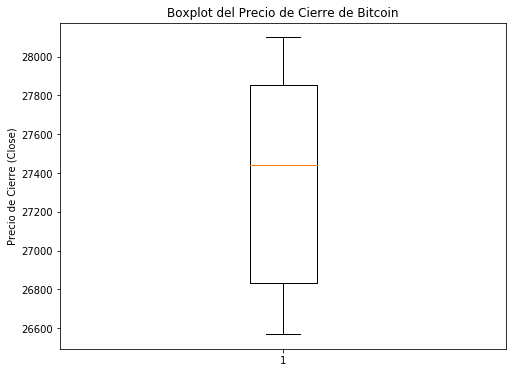

cuatil 1 : 26832.0546875
cuatil 3 : 27855.5751953125


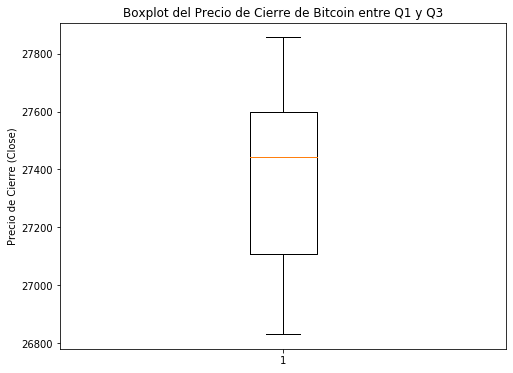

Precio promedio:  27374.490735078278


In [141]:
def limpieza_datos():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    import numpy as np

    df_bitcoin_limpio = df_bitcoin.copy()

    # Identificar valores duplicados en el índice
    valores_duplicados_en_indice = df_bitcoin_limpio.index.duplicated()
    print(valores_duplicados_en_indice)

    # Eliminar los valores duplicados en el índice
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
    #df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates(keep='first')

    # verificar y ver los valores nulos en la columna 
    df_bitcoin_nulos = df_bitcoin_limpio['Close'].isnull().sum()
    print("Valores nulos en Close:", df_bitcoin_nulos)
    # Elimina valores nulos en la columna Close
    df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])


    # Filtra los registros con Volumen mayor a 0
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # crea un grafico de caja de la columna close
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
    plt.ylabel('Precio de Cierre (Close)')
    plt.title('Boxplot del Precio de Cierre de Bitcoin')
    plt.show()

    # Calcula los cuartiles Q1 y Q3 
    Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
    Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
    print("cuatil 1 :", Q1)
    print("cuatil 3 :", Q3)
    # Filtra para tener un precio de cierre entre Q1 y Q3
    df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]
    # grafico el df con los valores entre q1 y q3
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
    plt.ylabel('Precio de Cierre (Close)')
    plt.title('Boxplot del Precio de Cierre de Bitcoin entre Q1 y Q3')
    plt.show()

    # Calcula el precio promedio de la columna close
    media_bitcoin = df_bitcoin_limpio['Close'].mean()
    print("Precio promedio: ", media_bitcoin)
limpieza_datos()    

In [93]:
antes de eliminar volumen mayo a 0
# df_bitcoin_limpio

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-06 00:00:00+00:00,27412.123047,27423.445312,27412.123047,27423.054688,27423.054688,0
2023-10-06 00:05:00+00:00,27423.642578,27423.642578,27418.119141,27418.119141,27418.119141,0
2023-10-06 00:10:00+00:00,27422.910156,27422.910156,27415.296875,27415.880859,27415.880859,16424960
2023-10-06 00:15:00+00:00,27416.308594,27416.308594,27405.029297,27405.029297,27405.029297,3702784
2023-10-06 00:20:00+00:00,27405.863281,27412.542969,27401.708984,27412.542969,27412.542969,0
...,...,...,...,...,...,...
2023-10-12 23:35:00+00:00,26755.378906,26759.136719,26755.378906,26755.503906,26755.503906,2469888
2023-10-12 23:40:00+00:00,26755.205078,26755.205078,26742.878906,26742.878906,26742.878906,0
2023-10-12 23:45:00+00:00,26744.394531,26748.183594,26744.394531,26745.517578,26745.517578,0


In [99]:
# despues de eliminar volumen mayor a 0
df_bitcoin_limpio 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-06 00:10:00+00:00,27422.910156,27422.910156,27415.296875,27415.880859,27415.880859,16424960
2023-10-06 00:15:00+00:00,27416.308594,27416.308594,27405.029297,27405.029297,27405.029297,3702784
2023-10-06 00:25:00+00:00,27433.865234,27448.648438,27433.865234,27448.648438,27448.648438,9263104
2023-10-06 00:30:00+00:00,27448.648438,27454.777344,27448.648438,27453.962891,27453.962891,11491328
2023-10-06 01:10:00+00:00,27490.042969,27496.724609,27488.646484,27496.724609,27496.724609,8071168
...,...,...,...,...,...,...
2023-10-12 22:20:00+00:00,26736.339844,26736.339844,26729.187500,26732.203125,26732.203125,4874240
2023-10-12 22:50:00+00:00,26732.199219,26744.281250,26732.199219,26744.281250,26744.281250,6474752
2023-10-12 22:55:00+00:00,26747.220703,26747.220703,26742.388672,26745.003906,26745.003906,2764800


In [109]:
# despues de filtrar y eliminar vañores atipicos
df_bitcoin_limpio 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-06 00:10:00+00:00,27422.910156,27422.910156,27415.296875,27415.880859,27415.880859,16424960
2023-10-06 00:15:00+00:00,27416.308594,27416.308594,27405.029297,27405.029297,27405.029297,3702784
2023-10-06 00:25:00+00:00,27433.865234,27448.648438,27433.865234,27448.648438,27448.648438,9263104
2023-10-06 00:30:00+00:00,27448.648438,27454.777344,27448.648438,27453.962891,27453.962891,11491328
2023-10-06 01:10:00+00:00,27490.042969,27496.724609,27488.646484,27496.724609,27496.724609,8071168
...,...,...,...,...,...,...
2023-10-11 11:40:00+00:00,27222.488281,27223.388672,27212.701172,27223.388672,27223.388672,4585472
2023-10-11 11:45:00+00:00,27218.650391,27218.650391,27187.955078,27199.869141,27199.869141,18009088
2023-10-11 11:50:00+00:00,27196.847656,27202.195312,27190.498047,27190.498047,27190.498047,9917440


[False False False ... False False False]
Valores nulos en Close: 0


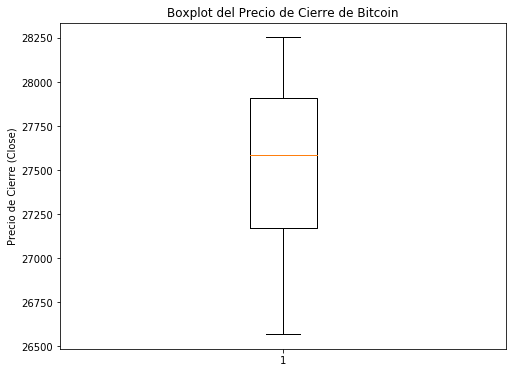

cuatil 1 : 27173.4697265625
cuatil 3 : 27906.662109375


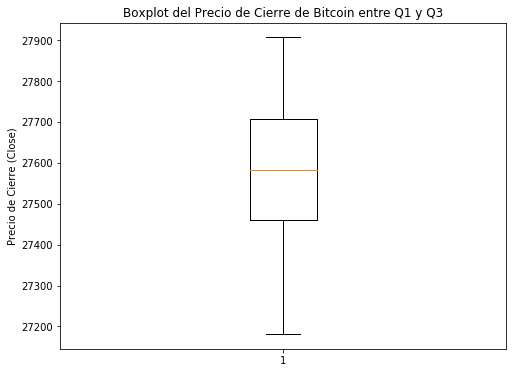

27596.80760025289

In [112]:
import numpy as np

df_bitcoin_limpio = df_bitcoin.copy()

# Identificar valores duplicados en el índice
valores_duplicados_en_indice = df_bitcoin_limpio.index.duplicated()
print(valores_duplicados_en_indice)

# Eliminar los valores duplicados en el índice
df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
#df_bitcoin_limpio = df_bitcoin_limpio.drop_duplicates(keep='first')

# verificar y ver los valores nulos en la columna 
df_bitcoin_nulos = df_bitcoin_limpio['Close'].isnull().sum()
print("Valores nulos en Close:", df_bitcoin_nulos)
# Elimina valores nulos en la columna Close
df_bitcoin_limpio = df_bitcoin_limpio.dropna(subset=['Close'])


# Filtra los registros con Volumen mayor a 0
df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

# crea un grafico de caja de la columna close
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
plt.ylabel('Precio de Cierre (Close)')
plt.title('Boxplot del Precio de Cierre de Bitcoin')
plt.show()

# Calcula los cuartiles Q1 y Q3 
Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
Q3 = df_bitcoin_limpio['Close'].quantile(0.75)
print("cuatil 1 :", Q1)
print("cuatil 3 :", Q3)
# Filtra para tener un precio de cierre entre Q1 y Q3
df_bitcoin_limpio = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]
# grafico el df con los valores entre q1 y q3
plt.figure(figsize=(8, 6))
plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
plt.ylabel('Precio de Cierre (Close)')
plt.title('Boxplot del Precio de Cierre de Bitcoin entre Q1 y Q3')
plt.show()

# Calcula el precio promedio de la columna close
media_bitcoin = df_bitcoin_limpio['Close'].mean()
media_bitcoin

In [ ]:
# Eliminar filas con valores nulos
df = df.dropna(subset=['Ventas'])

# identificar valores nduplicados
duplicados = df.duplicated()

In [92]:
df_bitcoin_limpio['Close']


Datetime
2023-10-06 00:00:00+00:00    27423.054688
2023-10-06 00:05:00+00:00    27418.119141
2023-10-06 00:10:00+00:00    27415.880859
2023-10-06 00:15:00+00:00    27405.029297
2023-10-06 00:20:00+00:00    27412.542969
                                 ...     
2023-10-12 23:35:00+00:00    26755.503906
2023-10-12 23:40:00+00:00    26742.878906
2023-10-12 23:45:00+00:00    26745.517578
2023-10-12 23:50:00+00:00    26737.386719
2023-10-12 23:55:00+00:00    26755.199219
Name: Close, Length: 2016, dtype: float64

In [90]:
df_bitcoin_limpio

0

In [ ]:
# Buscar valores nulos en la columna 'Close'
valores_nulos = df_bitcoin_limpio['Close'].isnull()

# Tratar valores nulos asignando un valor específico (por ejemplo, 0) o utilizando métodos como fillna
df_bitcoin_limpio['Close'].fillna(0, inplace=True)
# Otra opción: df_bitcoin_limpio['Close'].fillna(method='ffill', inplace=True) para rellenar con el valor anterior

# Puedes verificar si quedan valores nulos en la columna 'Close' con:
valores_nulos_actualizados = df_bitcoin_limpio['Close'].isnull()


In [74]:
df_bitcoin_limpio.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [75]:
df_bitcoin_limpio.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [76]:
# Contar cuantos datos duplicados existen
df_bitcoin_limpio.duplicated().sum()

0

- 1 Eliminación de filas con valores nulos: Si los valores nulos son pocos y no afectan significativamente tus análisis  df = df.dropna(subset=['Close'])



- 2 Relleno de valores nulos: En lugar de eliminar filas, puedes optar por rellenar los valores nulos con un valor específico, como 0 o el valor anterior (forward-fill). Esto puede ser útil si prefieres mantener todas las filas en tus datos. Por ejemplo, para rellenar con 0 df['Close'].fillna(0, inplace=True), O para rellenar con el valor anterior: df['Close'].fillna(method='ffill', inplace=True)



- 3 Interpolación: Si los valores nulos están relacionados con datos de series temporales, puedes utilizar la interpolación para estimar los valores faltantes en función de los valores circundantes. Pandas ofrece varios métodos de interpolación, como 'linear', 'polynomial', 'spline', entre otros. df['Close'].interpolate(method='linear', inplace=True)


# 4. Tomar decisiones

In [ ]:
Descripción

Tomar decisiones
Llegó el momento de construir tu algoritmo de decisión:

Crea una funcion tomar_decisiones(), dentro de ella, define nuevamente las variables globales(ver Paso1) y 
escribe tu código:

Rellena la variable algoritmo_decision con el valor resultante del siguiente criterio de decisión:
Si el precio actual es mayor/igual que el precio promedio y la tendencia es de baja, entonces guarda el valor ‘Vender’.
Si el precio actual es menor que el precio promedio y la tendencia es de alta, entonces guarda el valor ‘Comprar’.
Si ninguna de las 2 condiciones anteriores se cumple, entonces guarda el valor ''.
Extra
Este es un algoritmo de decisión simple que ayuda a los clientes inexpertos a conocer el mejor momento de comprar
o vender Bitcoin, ¿crees que existan otros indicadores en la base o en el site de noticias o algún criterio de 
decisión adicional que ayudaría a reforzar el algoritmo de decisión? Te invito a descubrir otras alternativas.



In [142]:
def tomar_decisiones():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    if precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = 'Vender'
    elif precio_actual < media_bitcoin and tendencia == 'alta':
        algoritmo_decision = 'Comprar'
    else:
        algoritmo_decision = ''
    print(algoritmo_decision)
tomar_decisiones()    

Comprar


# 5. Visualización

In [ ]:
Descripción

Visualización
Crea una funcion visualizacion(), dentro de ella, define nuevamente las variables globales(ver Paso1) y escribe tu código:

Adiciona una nueva columna (Promedio) al dataframe original df_bitcoin y almacena el valor de nuestra variable
media_bitcoin.

Configura el tamaño del gráfico en una proporción de 16x5.
Adiciona un título al gráfico.
Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Close de la base 
df_bitcoin.

Usando el método plot()dibuja una línea en el gráfico, con los datos del índice y la columna Promedio de la base
df_bitcoin.
Usando el método annotate()muestra un mensaje dentro del gráfico con la decisión calculada del algoritmo.
Finalmente, usando el método show()muestra en pantalla el gráfico que acabamos de configurar.
Apoyo
Puedes encontrar más información sobre la biblioteca matplotlib en su página oficial: matplotlib.pyplot

In [ ]:
def visualizacion():
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    

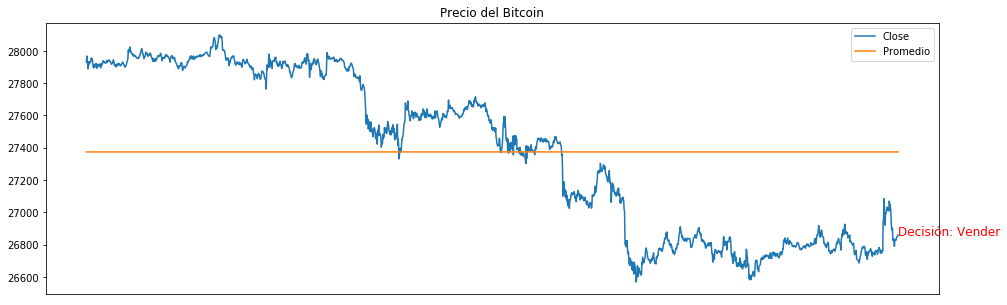

In [148]:
global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
    
# crear una nueva columna en df_bitcoin y llenar con los valores del promedio
df_bitcoin['Promedio'] = media_bitcoin

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convertir el índice a una columna de fecha en formato de cadena
df_bitcoin['DateStr'] = df_bitcoin.index.strftime('%Y-%m-%d %H:%M:%S')

# Configurar el tamaño del gráfico en una proporción de 16x5
plt.figure(figsize=(16, 5))

# Dibujar una línea con los datos de la columna 'DateStr' y la columna 'Close'
plt.plot(df_bitcoin['DateStr'], df_bitcoin['Close'], label='Close')

# Dibujar una línea con los datos de la columna 'DateStr' y la columna 'Promedio'
plt.plot(df_bitcoin['DateStr'], df_bitcoin['Promedio'], label='Promedio')

# Agregar un título al gráfico
plt.title('Precio del Bitcoin')

# Mostrar un mensaje con la decisión en el gráfico
algoritmo_decision = 'Vender'  # Cambia esto al valor real
plt.annotate(f'Decisión: {algoritmo_decision}', (df_bitcoin['DateStr'].iloc[-1], df_bitcoin['Close'].iloc[-1]), fontsize=12, color='red')

# Configurar el formato de las fechas en el eje x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Agregar una leyenda para las líneas
plt.legend()

# Mostrar el gráfico en pantalla
plt.show()


In [125]:
df_bitcoin.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Promedio     float64
dtype: object

In [120]:
df_bitcoin  

,Open,High,Low,Close,Adj Close,Volume,Promedio
Datetime,,,,,,,
2023-10-06 00:00:00+00:00,27412.123047,27423.445312,27412.123047,27423.054688,27423.054688,0,27596.8076
2023-10-06 00:05:00+00:00,27423.642578,27423.642578,27418.119141,27418.119141,27418.119141,0,27596.8076
2023-10-06 00:10:00+00:00,27422.910156,27422.910156,27415.296875,27415.880859,27415.880859,16424960,27596.8076
2023-10-06 00:15:00+00:00,27416.308594,27416.308594,27405.029297,27405.029297,27405.029297,3702784,27596.8076
2023-10-06 00:20:00+00:00,27405.863281,27412.542969,27401.708984,27412.542969,27412.542969,0,27596.8076
...,...,...,...,...,...,...,...
2023-10-12 23:35:00+00:00,26755.378906,26759.136719,26755.378906,26755.503906,26755.503906,2469888,27596.8076
2023-10-12 23:40:00+00:00,26755.205078,26755.205078,26742.878906,26742.878906,26742.878906,0,27596.8076
2023-10-12 23:45:00+00:00,26744.394531,26748.183594,26744.394531,26745.517578,26745.517578,0,27596.8076


# 6. Automatización

In [ ]:
Descripción

Automatización
El trabajo de un Data Scientist sólo termina cuando la solución al problema está automatizada, esto permite 
soluciones automáticas para nuevos lotes de información.

Importa el método 'clear_output()', este método nos permite borrar los resultados de la pantalla antes de 
imprimir un nuevo gráfico, y así evitar tener más de un gráfico en la pantalla, impórtalo de la siguiente 
forma: from IPython.display import clear_output.
    
Importa también la biblioteca ‘time’ de la siguiente forma: import time, utilizaremos su método time.sleep(300) 
para interrumpir la ejecución del código cada 300 segundos o 5 minutos.

Finalmente construiremos un loop infinito para ejecutar permanentemente y en intervalos de 5minutos, las funciones 
que hemos construído en los pasos 2 al 5 de nuestro proyecto, de la siguiente forma:
    
    
while(True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  time.sleep(300)

El resultado de este código será un gráfico mostrando el histórico de precios del Bitcoin y la decisión del 
algoritmo en tiempo real, basado en datos normalizados y limpios, que se actualizarán cada 5 minutos.

Conclusión
Este desafío sólo fue una demonstración de un proyecto real, donde vemos el poder de los datos para la toma de 
decisiones y la importancia que tiene el tratamiento de los datos para evitar tomar decisiones equivocadas, 
durante este Bootcamp aprenderás nuevas herramientas y habilidades que te llevarán a ti y a este proyecto a un 
nuevo nivel.

¡Ahora, tu misión, si decides aceptarla, es, superar este Robot! ¡Suerte!

In [ ]:
taniamontellanoc@gmail.com   enviar archivos 

In [126]:
# Extraer el nombre de Bitcoin
p_elements_with_bitcoin = soup.find_all('p', string='Bitcoin')
for p_element in p_elements_with_bitcoin:
    #print(p_element.text)
    nombre=p_element.text

# Busca el elemento <a> con el atributo href
a_element = soup.find('a', href='/currencies/bitcoin/#markets')
# Si se encuentra la etiqueta <a> con el atributo href
if a_element:
    # Luego, busca el elemento <span> dentro de la etiqueta <a>
    span_element = a_element.find('span')
    if span_element:
        #print(span_element.text)
        precio=span_element.text
    else:
        print("No se encontró el elemento <span> dentro de la etiqueta <a> con el atributo href.")
else:
    print("No se encontró la etiqueta <a> con el atributo href.")

#nombre = soup.find('p', class_='sc-4984dd93-0 kKpPOn').text

# Extraer el precio de Bitcoin
#precio = soup.find('div', class_='sc-a0353bbc-0 gDrtaY').text
#precio = soup.find('span').text

# Imprimir el nombre y el precio
print(f"Nombre: {nombre}")
print(f"Precio: {precio}")

Nombre: Bitcoin
Precio: $26,761.68


In [38]:
import matplotlib.pyplot as plt
# Definir variables globales

def limpiezadatos(df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision):
 df_bitcoin_limpio=df_bitcoin
 #print(df_bitcoin_limpio.head(10))

 # Identificar y tratar duplicados en el índice
 df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated(keep='first')]
 print(df_bitcoin_limpio[df_bitcoin_limpio['Close'].isnull()])
 df_bitcoin_limpio.dropna(subset=["Close"],inplace=True)

#borrar valores de volume menores o igual q 0
 df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] <= 0]

#graficando outliers
 columna_a_graficar = df_bitcoin_limpio['Close']
 # Crear un boxplot
 plt.boxplot(columna_a_graficar)
 plt.title('Boxplot de la columna "Close"')
 plt.ylabel('Valores de "Open"')
 
# Mostrar el gráfico
 plt.show()
 # Calcular el rango intercuartílico (IQR)
 Q1 = columna_a_graficar.quantile(0.25)
 Q3 = columna_a_graficar.quantile(0.75)
 IQR = Q3 - Q1
 
 # Definir límites inferior y superior para identificar outliers
 limite_inferior = Q1 - 1.5 * IQR
 limite_superior = Q3 + 1.5 * IQR
 
 # Filtrar el DataFrame para eliminar outliers
 df_bitcoin_limpio = df_bitcoin_limpio[(columna_a_graficar >= limite_inferior) & (columna_a_graficar <= limite_superior)]
 
 # Crear un boxplot del DataFrame sin outliers para verificar
 plt.boxplot(df_bitcoin_limpio['Close'])
 plt.title('Boxplot de la columna "Close" sin outliers')
 plt.ylabel('Valores de "Close"')
 
 # Mostrar el gráfico
 plt.show()

 #guardar en media_close
 media_close = df_bitcoin_limpio['Close'].mean()
 # Imprimir el DataFrame resultante
 print(media_close)
 print(df_bitcoin_limpio.shape)
 print(df_bitcoin.shape)
  
limpiezadatos(df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision)

NameError: name 'precio_actual' is not defined

In [36]:
 #Creamos una copia
df_bitcoin_limpio = df_bitcoin.copy()
def limpiar_data (data):
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision
  #identifica duplicados en el índice y trátalos para quedarte con sólo índices únicos.

indices_duplicados = data.index.duplicated()
nRepetidos_ind = indices_duplicados.sum()
if nRepetidos_ind > 0:
    data = data[~indices_duplicados]
  
  #busca por valores nulos en la columna Close

nRepetidos_close = data["Close"].isna().sum()
if nRepetidos_close > 0 :
    data["Close"] = data["Close"].dropna()

  #Verifica que todos los registros de la base tengan un Volume de transacción mayor a 0, caso contrário, elimínalos.
data = data[data["Volume"] > 0]
  #Deberás identificar y eliminar los outliers en el precio del Bitcoin, columna Close, utiliza un gráfico de boxplot para identificarlos.
graficarBoxPlot_Close(data)
q1 = data["Close"].quantile(0.25)
q3 = data["Close"].quantile(0.75)
data = data[(data["Close"] >=q1) & (data["Close"]<=q3)]
media_bitcoin = data["Close"].mean()
return data

limpiar_data(df_bitcoin_limpio)

NameError: name 'graficarBoxPlot_Close' is not defined